# Week 8 - More Regression

## Types of Regression

* Simple Linear Regression
* Multiple Linear Regression
* Polynomial Regression
* Support Vector Regression
* Decision Tree Regression
* Random Forest Regression

## Simple Linear Regression

$y = \beta_0 + \beta_1 x_1 + \epsilon$

where:
* y = dependent variable
* x = explanatory  variable
* $\beta_0$ = y intercept
* $\beta_n$ = slope coefficients
* $\epsilon$ = the model's error term

## Multiple Linear Regression

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 ... + \beta_n x_n + \epsilon$

## Polynomial Regression

$y = \beta_0 + \beta_1 x + \beta_2 x^2 ... + \beta_n x^n + \epsilon$

* Literature says one x that uses exponentials
* Look for a scatterplot with an exponential curve
* Used to describe how diseases spread, pandemics, or epidemics
* When we talk about linear, we're talking about the coefficients, not x
* The degree of the coefficient is 1, and a degree of 1 is linear

Check this out:

<pre>
Degree |   Name     | Example
  0    | Constant   | x
  1    |  Linear    | x + 3
  2    | Quadratic  | x^2 - x + 1
etc.
</pre>

https://www.mathsisfun.com/algebra/degree-expression.html

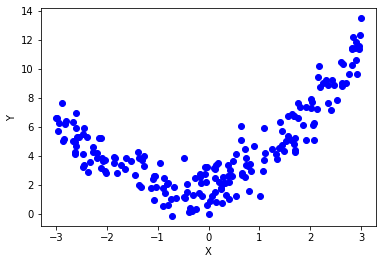

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

X = 6 * np.random.rand(200, 1) - 3
noise = np. random. normal(0, 1, X.shape)
y = 0.8*X**2 + 0.9*X + 2 + noise
# y = 0.7 * X**3 + 0.8 * X**2 + 0.9*X + 2 + noise

plt.scatter(X, y, color='blue')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [2]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

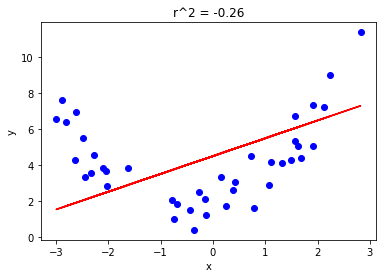

In [3]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

plt.plot(X_test, predictions, color='red')
plt.scatter(X_test, y_test, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'r^2 = {r2_score(y_test, predictions):.2}')
plt.show()

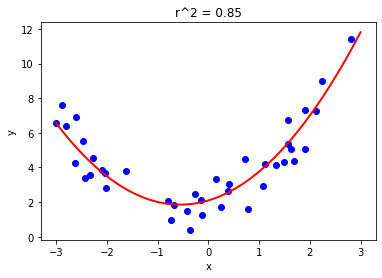

In [4]:
# add quadratic polynomial features
poly = PolynomialFeatures(degree=2)
poly_train = poly.fit_transform(X_train)
poly_test = poly.transform(X_test)

model = LinearRegression()
model.fit(poly_train, y_train)
y_pred = model.predict(poly_test)
r2score = r2_score(y_test, y_pred)

xs = np.linspace(-3, 3, len(X_test)).reshape(-1, 1)
Xpoly = poly.transform(xs)
predictions = model.predict(Xpoly)

plt.plot(xs, predictions, color='red', linewidth=2)
plt.scatter(X_test, y_test, color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.title(f'r^2 = {r2score:.2}')
plt.show()

### Underfitting and Overfitting

See Week 08: Underfitting and Overfitting

## Support Vector Regression

* Similar to linear regression but $y = \beta_0 + \beta_1 x_1$ is refered to as a hyperplane
* SVR uses a margin that tries to capture as many of the plots as possible
* Margins are measured by epsilon which defines the epsilon insensitive tube
* Points in the tube are not considered errors
* Support vectors are points along the edges of the tube or decision surface
* More on this with Support Vector Classifiers

In [5]:
# scale data
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

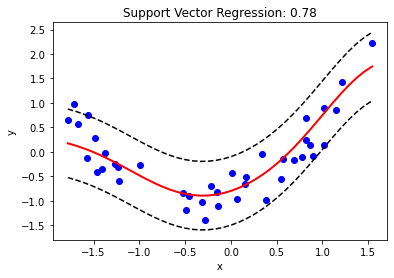

In [6]:
# SVR model
from sklearn.svm import SVR

model = SVR(kernel='rbf', epsilon=0.7)
model.fit(X_train, y_train.ravel())
predictions = model.predict(X_test)
r2score = r2_score(y_test, predictions)

xs = np.linspace(X_test.min(), X_test.max(), len(X_test)).reshape(len(X_test), 1)
reg_line = model.predict(xs)

plt.scatter(X_test, y_test, color = 'blue')
plt.plot(xs, reg_line, 'r-', linewidth=2)
plt.plot(xs, reg_line + model.epsilon, 'k--')
plt.plot(xs, reg_line - model.epsilon, 'k--')
plt.title(f'Support Vector Regression: {r2score:.2}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Decision Tree Regression

* CART: Classification and Regression Trees
* Decision trees use splits to partition data points
* When drawing our regression line, we first find out where the split is and then return the mean of that split. The most common labeled value is returned in classification
* The regression line is fit on the training data and is used to predict test data

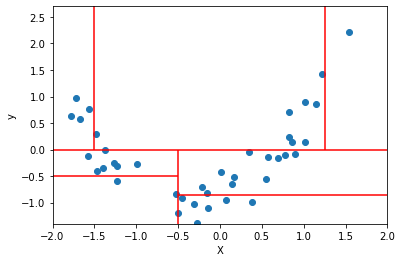

In [7]:
plt.scatter(X_test ,y_test)
plt.axhline(y=0, color='red')
plt.hlines(y=-0.5, xmin=-2.0, xmax=-0.5, color='red')
plt.hlines(y=-0.85, xmin=-0.5, xmax=2, color='red')
plt.vlines(x=-1.5, ymin=0, ymax=2.7, color='red')
plt.vlines(x=-0.5, ymin=-1.4, ymax=0, color='red')
plt.vlines(x=1.25, ymin=0, ymax=2.7, color='red')
plt.xlim(-2, 2)
plt.ylim(-1.4, 2.7)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

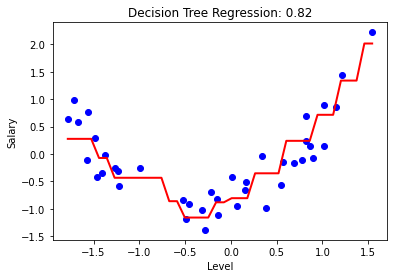

In [8]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(min_samples_leaf=10)
model.fit(X_train.reshape(-1, 1), y_train)
predictions = model.predict(X_test)
r2score = r2_score(y_test, predictions)

xs = np.linspace(X_test.min(), X_test.max(), len(X_test)).reshape(-1, 1)
reg_line = model.predict(xs)

plt.scatter(X_test, y_test, color = 'blue')
plt.plot(xs, reg_line, 'r-', linewidth=2)
plt.title(f'Decision Tree Regression: {r2score:.2}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

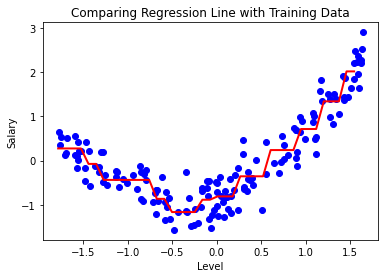

In [9]:
# Comparing Regression Line with Training Data
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(xs, reg_line, 'r-', linewidth=2)
plt.title(f'Comparing Regression Line with Training Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Random Forest Regression

* Random forest is a version of ensemble learning
* Ensemble learning combines multiple algorithms or multiple attempts of one algorithm to provide better predictive performance
* Random forests pick random data points from training set
* Builds a decision tree that best fits the random data points
* Repeat this multiple times (ex. 1000 times)
* Return average

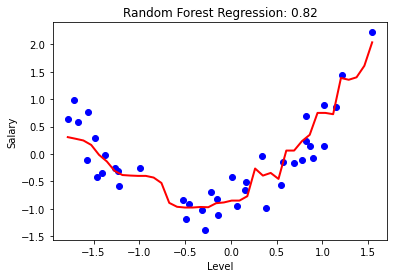

In [10]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 50, max_leaf_nodes=10)
model.fit(X_train.reshape(-1, 1), y_train.ravel())
predictions = model.predict(X_test)
r2score = r2_score(y_test, predictions)

xs = np.linspace(X_test.min(), X_test.max(), len(X_test)).reshape(len(X_test), 1)
reg_line = model.predict(xs)

plt.scatter(X_test, y_test, color = 'blue')
plt.plot(xs, reg_line, 'r-', linewidth=2)
plt.title(f'Random Forest Regression: {r2score:.2}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()